List jar dependencies and where to find them, if necessary

In [1]:
@file:Repository("http://maven.huygens.knaw.nl/repository/")
@file:DependsOn("eu.interedition:collatex-core:1.7.1")
@file:DependsOn("nl.knaw.huygens:graphviz-wrapper:1.1")

Show the classpath

In [2]:
:classpath

Current classpath (13 paths):
/home/bramb/.local/lib/python3.6/site-packages/run_kotlin_kernel/jars/jupyter-lib-0.8.2.61.jar
/home/bramb/.local/lib/python3.6/site-packages/run_kotlin_kernel/jars/kotlin-script-runtime-1.4.20-dev-2342.jar
/home/bramb/.local/lib/python3.6/site-packages/run_kotlin_kernel/jars/kotlin-reflect-1.4.20-dev-2342.jar
/home/bramb/.local/lib/python3.6/site-packages/run_kotlin_kernel/jars/kotlin-stdlib-1.4.20-dev-2342.jar
/home/bramb/.local/lib/python3.6/site-packages/run_kotlin_kernel/jars/kotlin-stdlib-common-1.4.20-dev-2342.jar
/home/bramb/.local/lib/python3.6/site-packages/run_kotlin_kernel/jars/annotations-13.0.jar
/home/bramb/.ivy2/cache/eu.interedition/collatex-core/jars/collatex-core-1.7.1.jar
/home/bramb/.ivy2/cache/nl.knaw.huygens/graphviz-wrapper/jars/graphviz-wrapper-1.1.jar
/home/bramb/.ivy2/cache/org.jetbrains.kotlin/kotlin-stdlib-jdk8/jars/kotlin-stdlib-jdk8-1.4.0.jar
/home/bramb/.ivy2/cache/org.jetbrains.kotlin/kotlin-stdlib/jars/kotlin-stdlib-1.4.0.

Imports

In [3]:
import eu.interedition.collatex.*
import eu.interedition.collatex.dekker.*
import eu.interedition.collatex.simple.*
import eu.interedition.collatex.matching.*
import nl.knaw.huygens.graphviz.DotEngine

Some convenience functions

In [4]:
import java.io.*

val collationAlgorithm = DekkerAlgorithm(EqualityTokenComparator())

fun createWitnesses(vararg contents: String): List<SimpleWitness>{
    val SIGLA = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    return contents.mapIndexed {i,c -> SimpleWitness(SIGLA[i].toString(),c) }
}

fun collate(witnesses:List<SimpleWitness>): VariantGraph {
    val graph = VariantGraph()
    collationAlgorithm.collate(graph,witnesses)
    return graph
}

fun VariantGraph.asDot(): String {
    val writer = StringWriter()
    SimpleVariantGraphSerializer(this).toDot(writer)
    return writer.toString()
}

fun VariantGraph.asSVGPair(): Pair<String, String> =
    Pair(
        "image/svg+xml",
        DotEngine().renderAs(
            "svg",
            this.asDot()
        )
    )

fun VariantGraph.show() = MIME(this.asSVGPair())


And now, a use case:

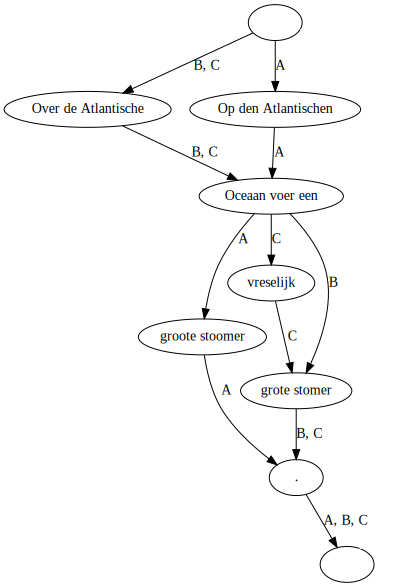

In [5]:
val textD1 = "Op den Atlantischen Oceaan voer een groote stoomer.";
val textD9 = "Over de Atlantische Oceaan voer een grote stomer.";
val textDMD1 = "Over de Atlantische Oceaan voer een vreselijk grote stomer.";

val w = createWitnesses(textD1,textD9,textDMD1)
val graph = collate(w)
val jg = VariantGraph.JOIN.apply(graph)
jg.show()